In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


print(df.head())




label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Epoch 1/10
53/53 [==============================] - 1s 4ms/step - loss: 6.0409 - accuracy: 0.1688 - val_loss: 2.4591 - val_accuracy: 0.2246
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 2.0770 - accuracy: 0.2832 - val_loss: 1.8319 - val_accuracy: 0.3877
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 1.6664 - accuracy: 0.3519 - val_loss: 1.5079 - val_accuracy: 0.4066
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 1.4309 - accuracy: 0.4336 - val_loss: 1.4405 - val_accuracy: 0.4563
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 1.3157 - accuracy: 0.4947 - val_loss: 1.3278 - val_accuracy: 0.4326
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 1.2465 - accuracy: 0.5213 - val_loss: 1.2799 - val_accuracy: 0.4823
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 1.1921 - accuracy: 0.5480 - val_loss: 1.1989 - val_accuracy: 0.5390
Epoch 8/10
53/53 [==

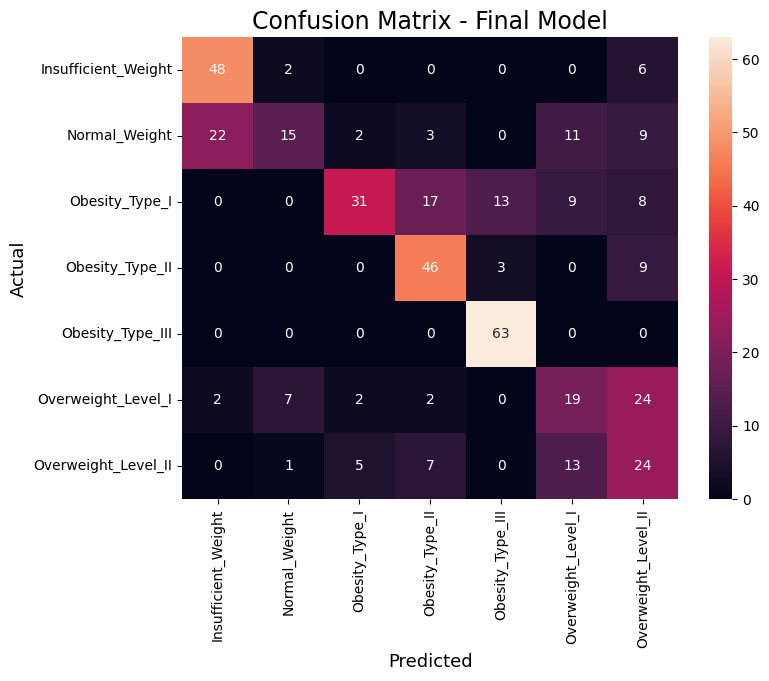

In [11]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)


model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer_adam = Adam(learning_rate=1e-3)

model_adam.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])


history_adam = model_adam.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot), verbose=1)


optimizer_sgd = SGD(learning_rate=1e-4)
model_adam.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_adam.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot), verbose=1)


test_loss, test_accuracy = model_adam.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

predictions = np.argmax(model_adam.predict(X_test), axis=1)


conf_matrix = confusion_matrix(np.argmax(y_test_one_hot, axis=1), predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix - Final Model', fontsize=17)
plt.show()



Epoch 1/10
53/53 [==============================] - 1s 4ms/step - loss: 7.7134 - accuracy: 0.1534 - val_loss: 1.9962 - val_accuracy: 0.2411
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 1.8220 - accuracy: 0.2293 - val_loss: 1.7258 - val_accuracy: 0.1844
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 1.6599 - accuracy: 0.2927 - val_loss: 1.5722 - val_accuracy: 0.2931
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 1.5333 - accuracy: 0.3643 - val_loss: 1.4901 - val_accuracy: 0.3381
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 1.4560 - accuracy: 0.3928 - val_loss: 1.4529 - val_accuracy: 0.4043
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 1.3689 - accuracy: 0.4449 - val_loss: 1.3183 - val_accuracy: 0.4539
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 1.2897 - accuracy: 0.4870 - val_loss: 1.2422 - val_accuracy: 0.5508
Epoch 8/10
53/53 [==

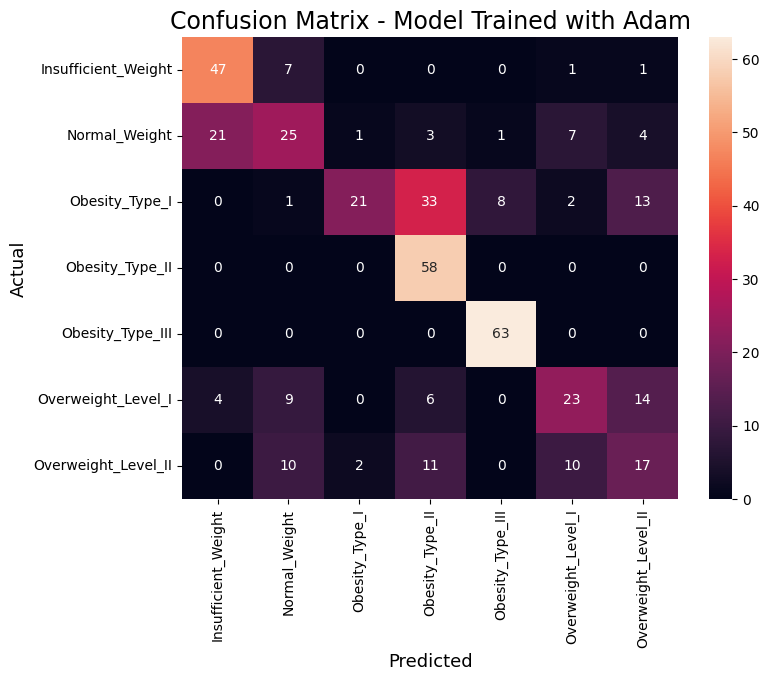

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)


model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer_adam = Adam(learning_rate=1e-3)

model_adam.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])


history_adam = model_adam.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot), verbose=1)


test_loss, test_accuracy = model_adam.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy with Adam: {test_accuracy * 100:.2f}%')


predictions_adam = np.argmax(model_adam.predict(X_test), axis=1)


conf_matrix_adam = confusion_matrix(np.argmax(y_test_one_hot, axis=1), predictions_adam)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adam, annot=True, fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix - Model Trained with Adam', fontsize=17)
plt.show()


Epoch 1/10
53/53 [==============================] - 1s 8ms/step - loss: 1.0818 - accuracy: 0.6019 - val_loss: 1.0947 - val_accuracy: 0.6076
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 1.0762 - accuracy: 0.6232 - val_loss: 1.0973 - val_accuracy: 0.5887
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 1.0779 - accuracy: 0.6102 - val_loss: 1.1062 - val_accuracy: 0.5934
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 1.0765 - accuracy: 0.6167 - val_loss: 1.1001 - val_accuracy: 0.5792
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 1.0739 - accuracy: 0.6066 - val_loss: 1.0954 - val_accuracy: 0.6170
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.6102 - val_loss: 1.0998 - val_accuracy: 0.5745
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 1.0748 - accuracy: 0.6108 - val_loss: 1.1005 - val_accuracy: 0.5981
Epoch 8/10
53/53 [==

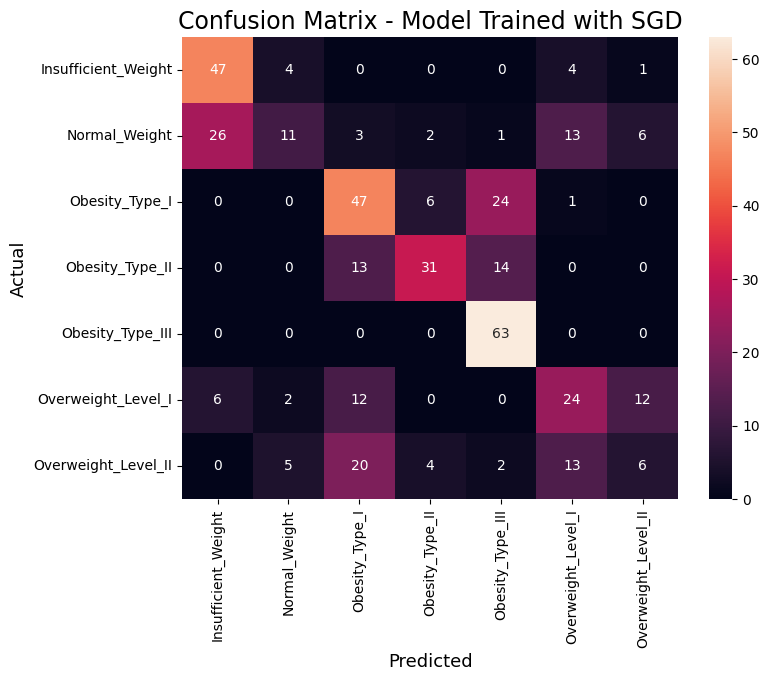

In [13]:

optimizer_sgd = SGD(learning_rate=1e-4)
model_adam.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])


history_sgd = model_adam.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot), verbose=1)


test_loss_sgd, test_accuracy_sgd = model_adam.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy with SGD: {test_accuracy_sgd * 100:.2f}%')


predictions_sgd = np.argmax(model_adam.predict(X_test), axis=1)


conf_matrix_sgd = confusion_matrix(np.argmax(y_test_one_hot, axis=1), predictions_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix - Model Trained with SGD', fontsize=17)
plt.show()
